In [1]:
import numpy as np
import pandas as pd
import csv
import json
import os

In [2]:
json_fp = open("good_bad_responses/gbmatch_20100208_160256.json", "r",encoding='utf-8')
csv_fp = open("word.csv", "w",encoding='utf-8',newline='')

writer = csv.writer(csv_fp)
data_list = json.load(json_fp)
keys = ['scramble', 'target', 'response', 'image_category', 'image_name', 'image_invert', 'image_list']
writer.writerow(keys)
rval= []
for i in range(len(data_list['testBlocks'])):
    for j in range(len(data_list['testBlocks'][0])):
        data = []
        data.append(data_list['testBlocks'][i][j]['scramble'][0])
        data.append(data_list['testBlocks'][i][j]['target'])
        if data_list['testBlocks'][i][j]['responses'] == []:
            data.append('N/A')
        else:
            data.append(data_list['testBlocks'][i][j]['responses'][0])
        data.append(data_list['testBlocks'][i][j]['images'][0]['Category'])
        data.append(data_list['testBlocks'][i][j]['images'][0]['ImageName'])
        data.append(data_list['testBlocks'][i][j]['images'][0]['invert'])
        data.append(data_list['testBlocks'][i][j]['images'][0]['List'])
        rval.append(data)
writer.writerows(rval)
json_fp.close()
csv_fp.close()
        



In [3]:
data_list['testBlocks'][1][26]['images'][0]['List']

'Bad'

In [7]:
data_list['testBlocks'][0][10]['scramble'][0] == True

True

In [72]:
data_list['testBlocks'][0][26]['responses'][0][0]

'match'

In [28]:
data_list['testBlocks'][0][10]['images']

[{'Category': 'beach',
  'ImageName': 'beaches_00504.jpg',
  'invert': False,
  'List': 'Bad',
  'pspath': 'images\\beaches_00504_PS.png',
  'Score': '3.13',
  'path': 'images\\beaches_00504.jpg',
  'ldpath': 'images\\beaches_00504_LD.png'}]

In [30]:
data_list['testBlocks'][0][10]['images'][0]['Category']
data_list['testBlocks'][0][10]['images'][0]['ImageName']
data_list['testBlocks'][0][10]['images'][0]['invert']
data_list['testBlocks'][0][10]['images'][0]['List']

'Bad'

In [102]:
data_list['staircaseBlocks'][0][10]

{'responses': [['match', 240.82486795340475]],
 'blank_time': 0.5,
 'fixation_size': [30, 30],
 'mask_time': 0.5,
 'position': [512.0, 384.0],
 'images': [{'Category': 'mountain',
   'ImageName': 'mountains_00507.jpg',
   'invert': False,
   'List': 'Middle',
   'pspath': 'images\\mountains_00507_PS.png',
   'Score': '4.012',
   'path': 'images\\mountains_00507.jpg',
   'ldpath': 'images\\mountains_00507_LD.png'}],
 'timeout_time': 16.0,
 'clarityRatings': [],
 'mask_numbers': [84, 59],
 'target': True,
 'linedrawing': [False, False],
 'invert': [False, False],
 'flip': [False, False],
 'image_time': 0.5,
 'categoryRatings': [],
 'start_times': [238.59685609507514,
  239.10431067674048,
  239.60278741854853,
  240.09849136965428,
  240.61396851145165],
 'fixation_time': 0.5,
 'size': [800, 600],
 'scramble': [False]}

In [52]:
directory = './good_bad_responses'
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        path = os.path.join(directory, filename)
        user = path.strip("./good_bad_responses/gbmatch.json")
        json_to_csv(path, user)
    else:
        continue

In [51]:
def json_to_csv(path, user):
    json_fp = open(path, "r",encoding='utf-8')
    csv_fp = open('./good_bad_responses/'+user+"_csv.csv", "w",encoding='utf-8',newline='')

    writer = csv.writer(csv_fp)
    data_list = json.load(json_fp)
    keys = ['scramble', 'target', 'response', 'image_category', 'image_name', 'image_invert', 'image_list']
    writer.writerow(keys)
    rval= []
    for i in range(len(data_list['testBlocks'])):
        for j in range(len(data_list['testBlocks'][0])):
            data = []
            data.append(data_list['testBlocks'][i][j]['scramble'][0])
            data.append(data_list['testBlocks'][i][j]['target'])
            if data_list['testBlocks'][i][j]['responses'] == []:
                data.append('N/A')
            else:
                data.append(data_list['testBlocks'][i][j]['responses'][0])
            data.append(data_list['testBlocks'][i][j]['images'][0]['Category'])
            data.append(data_list['testBlocks'][i][j]['images'][0]['ImageName'])
            data.append(data_list['testBlocks'][i][j]['images'][0]['invert'])
            data.append(data_list['testBlocks'][i][j]['images'][0]['List'])
            rval.append(data)
    writer.writerows(rval)
    json_fp.close()
    csv_fp.close()

In [17]:
def add_datamap(path, datamap):
    json_fp = open(path, "r",encoding='utf-8')
    data_list = json.load(json_fp)
    for i in range(len(data_list['testBlocks'])):
        for j in range(len(data_list['testBlocks'][0])):
            if data_list['testBlocks'][i][j]['responses'] == []:
                continue
            name = data_list['testBlocks'][i][j]['images'][0]['Category']
            inv = data_list['testBlocks'][i][j]['images'][0]['invert']
            qual = data_list['testBlocks'][i][j]['images'][0]['List']
            typeimg = data_list['testBlocks'][i][j]['responses'][0][0]
            val = False
            if typeimg == 'match' and data_list['testBlocks'][i][j]['target'] == True:
                val = True
            if typeimg == 'nonmatch' and data_list['testBlocks'][i][j]['scramble'][0] == True:
                val = True
            if inv == True:
                if val:
                    datamap[qual][name]['in'][0] += 1
                else:
                    datamap[qual][name]['in'][1] += 1
            else:
                if val:
                    datamap[qual][name]['up'][0] += 1
                else:
                    datamap[qual][name]['up'][1] += 1
        

In [18]:
directory = './good_bad_responses'
datamap = {'Good':
            {'beach':{'up':[0,0], 'in':[0,0]}, 
           'forest':{'up':[0,0], 'in':[0,0]},
           'highway':{'up':[0,0], 'in':[0,0]},
           'mountain':{'up':[0,0], 'in':[0,0]},
           'city':{'up':[0,0], 'in':[0,0]},
           'office':{'up':[0,0], 'in':[0,0]}},
            'Bad':
            {'beach':{'up':[0,0], 'in':[0,0]}, 
           'forest':{'up':[0,0], 'in':[0,0]},
           'highway':{'up':[0,0], 'in':[0,0]},
           'mountain':{'up':[0,0], 'in':[0,0]},
           'city':{'up':[0,0], 'in':[0,0]},
           'office':{'up':[0,0], 'in':[0,0]}}
           }
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        path = os.path.join(directory, filename)
        add_datamap(path, datamap)

In [19]:
datamap

{'Good': {'beach': {'up': [443, 118], 'in': [444, 138]},
  'forest': {'up': [450, 125], 'in': [386, 166]},
  'highway': {'up': [508, 88], 'in': [465, 101]},
  'mountain': {'up': [464, 124], 'in': [412, 148]},
  'city': {'up': [496, 88], 'in': [478, 96]},
  'office': {'up': [467, 101], 'in': [488, 114]}},
 'Bad': {'beach': {'up': [453, 133], 'in': [448, 117]},
  'forest': {'up': [441, 127], 'in': [409, 166]},
  'highway': {'up': [454, 119], 'in': [434, 131]},
  'mountain': {'up': [418, 128], 'in': [410, 187]},
  'city': {'up': [473, 92], 'in': [462, 99]},
  'office': {'up': [492, 102], 'in': [483, 109]}}}

In [11]:
slist = ['beach','forest','highway','mountain','city','office']
GUc = [datamap['Good'][n]['up'][0] for n in slist]
GUi = [datamap['Good'][n]['up'][1] for n in slist]
gur = sum(GUc) / (sum(GUc) + sum(GUi))
GIc = [datamap['Good'][n]['in'][0] for n in slist]
GIi = [datamap['Good'][n]['in'][1] for n in slist]
gir = sum(GIc) / (sum(GIc) + sum(GIi))
BUc = [datamap['Bad'][n]['up'][0] for n in slist]
BUi = [datamap['Bad'][n]['up'][1] for n in slist]
bur = sum(BUc) / (sum(BUc) + sum(BUi))
BIc = [datamap['Bad'][n]['in'][0] for n in slist]
BIi = [datamap['Bad'][n]['in'][1] for n in slist]
bir = sum(BIc) / (sum(BIc) + sum(BIi))

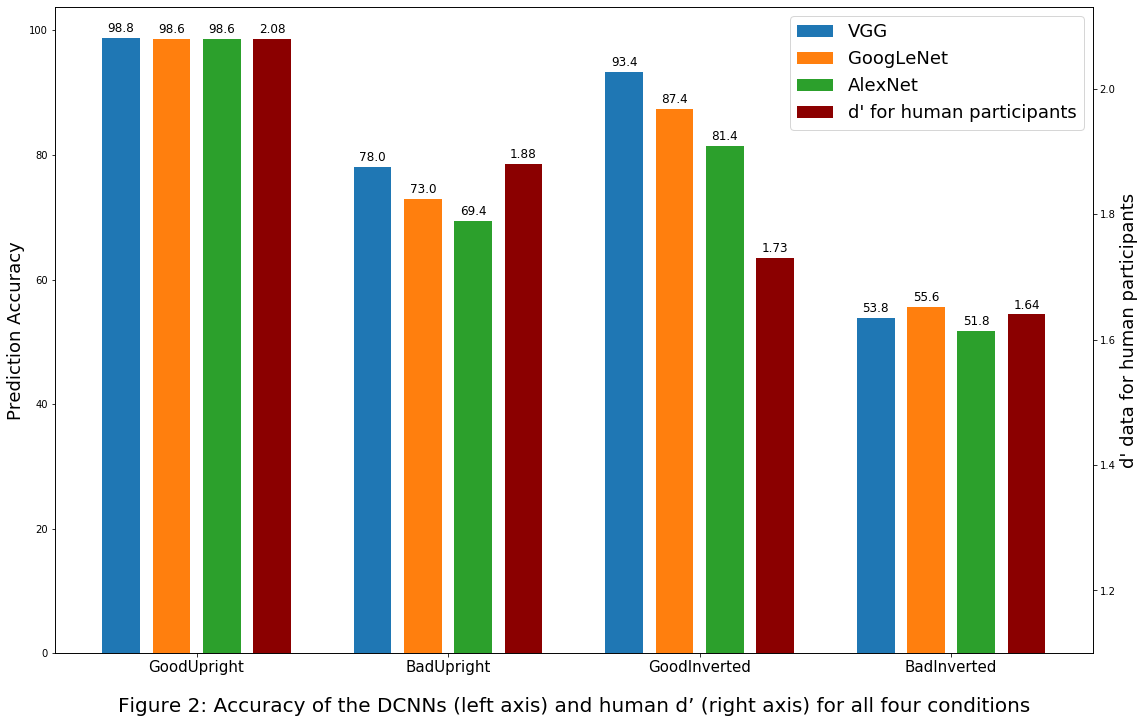

In [212]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
labels = ['GoodUpright', 'BadUpright', 'GoodInverted', 'BadInverted']
VGG = [98.8,  78, 93.4,  53.8]
Goo = [98.6,  73, 87.4,  55.6]
AP = [98.6,  69.4, 81.4,  51.8]
AH = [97.4,  71.4, 25.2,  15.9]
#human_ = [gur, bur, gir, bir]
#human = [round(i * 100, 1) for i in human_]
human_d = [2.08, 1.88, 1.73, 1.64]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(16,10)
rects1 = ax.bar(x - 0.3, VGG, width, label='VGG')
rects2 = ax.bar(x - 0.1, Goo, width, label='GoogLeNet')
rects3 = ax.bar(x + 0.1, AP, width, label='AlexNet')
#rects4 = ax.bar(x + 0.15, AH, width, label='AlexNet on both Place205 and ImageNet')
#rects5 = ax.bar(x + 0.3, human, width, label = 'human data')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prediction Accuracy', fontsize = 18)
ax.set_title('Figure 2: Accuracy of the DCNNs (left axis) and human d’ (right axis) for all four conditions', y = -0.1, fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 15)


ax2 = ax.twinx()
ax2.set_ylabel('d\' data for human participants', fontsize = 18)
ax2.set_ylim(1.1, 2.13)
rects4 = ax2.bar(x + 0.3, human_d, width, color = 'darkred', label = 'd\' for human participants')
#ax2.bar(x2_list, divergence, width=width, color='tab:blue', align='edge', tick_label=labels)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
for rect in rects4:
    height = rect.get_height()
    ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)
#autolabel(rects5)
plt.xticks(rotation=45)
fig.tight_layout()

plt.legend(handles = [rects1, rects2, rects3, rects4], prop={'size': 18})

plt.savefig('summary_3cat.png')

In [15]:
datamap_rate = {'Good':
            {'beach':{'up': 0 , 'in':0 }, 
           'forest':{'up':0, 'in':0},
           'highway':{'up':0, 'in':0},
           'mountain':{'up':0, 'in':0},
            'city':{'up':0, 'in':0},
           'office':{'up':0, 'in':0}},
            'Bad':
            {'beach':{'up': 0 , 'in':0 }, 
           'forest':{'up':0, 'in':0},
           'highway':{'up':0, 'in':0},
           'mountain':{'up':0, 'in':0},
             'city':{'up':0, 'in':0},
           'office':{'up':0, 'in':0}}
           }
for i in slist:
    for j in ['Good','Bad']:
        for k in ['up', 'in']:
            datamap_rate[j][i][k] = round(datamap[j][i][k][0] /( datamap[j][i][k][0] + datamap[j][i][k][1]) *100, 2)

In [16]:
datamap_rate

{'Good': {'beach': {'up': 78.97, 'in': 76.29},
  'forest': {'up': 78.26, 'in': 69.93},
  'highway': {'up': 85.23, 'in': 82.16},
  'mountain': {'up': 78.91, 'in': 73.57},
  'city': {'up': 84.93, 'in': 83.28},
  'office': {'up': 82.22, 'in': 81.06}},
 'Bad': {'beach': {'up': 77.3, 'in': 79.29},
  'forest': {'up': 77.64, 'in': 71.13},
  'highway': {'up': 79.23, 'in': 76.81},
  'mountain': {'up': 76.56, 'in': 68.68},
  'city': {'up': 83.72, 'in': 82.35},
  'office': {'up': 82.83, 'in': 81.59}}}

In [38]:
def add_datamap(path, datamap):
    json_fp = open(path, "r",encoding='utf-8')
    data_list = json.load(json_fp)
    for i in range(len(data_list['testBlocks'])):
        for j in range(len(data_list['testBlocks'][0])):
            if data_list['testBlocks'][i][j]['responses'] == []:
                continue
            name = data_list['testBlocks'][i][j]['images'][0]['Category']
            inv = data_list['testBlocks'][i][j]['images'][0]['invert']
            qual = data_list['testBlocks'][i][j]['images'][0]['List']
            
            typeimg = data_list['testBlocks'][i][j]['responses'][0][0]
            val = -1
            if typeimg == 'match': # intact
                if data_list['testBlocks'][i][j]['target'] == True:
                    val = 0 # hit
                else:
                    val = 1 # mis
            if typeimg == 'nonmatch': # scrambled
                if data_list['testBlocks'][i][j]['scramble'][0] == True:
                    val = 3 # cor rej
                else:
                    val = 2 # fa
            if inv == True:
                datamap[qual][name]['in'][val] += 1
            else:
                datamap[qual][name]['up'][val] += 1

In [39]:
from scipy.stats import norm
import math
Z = norm.ppf

def SDT(hits, misses, fas, crs):
    """ returns a dict with d-prime measures given hits, misses, false alarms, and correct rejections"""
    # Floors an ceilings are replaced by half hits and half FA's
    half_hit = 0.5 / (hits + misses)
    half_fa = 0.5 / (fas + crs)
 
    # Calculate hit_rate and avoid d' infinity
    hit_rate = hits / (hits + misses)
    if hit_rate == 1: 
        hit_rate = 1 - half_hit
    if hit_rate == 0: 
        hit_rate = half_hit
 
    # Calculate false alarm rate and avoid d' infinity
    fa_rate = fas / (fas + crs)
    if fa_rate == 1: 
        fa_rate = 1 - half_fa
    if fa_rate == 0: 
        fa_rate = half_fa
 
    # Return d', beta, c and Ad'
    out = {}
    out['d'] = Z(hit_rate) - Z(fa_rate)
    out['beta'] = math.exp((Z(fa_rate)**2 - Z(hit_rate)**2) / 2)
    out['c'] = -(Z(hit_rate) + Z(fa_rate)) / 2
    out['Ad'] = norm.cdf(out['d'] / math.sqrt(2))
    
    return(out)

In [73]:
directory = './good_bad_responses'
results = []
accuracies = []
for filename in os.listdir(directory):
    dm = {'Good':
            {'beach':{'up':[0,0,0,0], 'in':[0,0,0,0]}, 
           'forest':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'highway':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'mountain':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'city':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'office':{'up':[0,0,0,0], 'in':[0,0,0,0]}},
            'Bad':
            {'beach':{'up':[0,0,0,0], 'in':[0,0,0,0]}, 
           'forest':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'highway':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'mountain':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'city':{'up':[0,0,0,0], 'in':[0,0,0,0]},
           'office':{'up':[0,0,0,0], 'in':[0,0,0,0]}}
           }
    if filename.endswith(".json"):
        path = os.path.join(directory, filename)
        add_datamap(path, dm)
        
        all_acc = sum([dm['Good'][n]['up'][0] for n in slist]) + sum([dm['Good'][n]['up'][3] for n in slist])
        all_inacc = sum([dm['Good'][n]['up'][1] for n in slist]) + sum([dm['Good'][n]['up'][2] for n in slist])
        GU_accuracy = all_acc /(all_acc+all_inacc)
        all_acc = sum([dm['Good'][n]['in'][0] for n in slist]) + sum([dm['Good'][n]['in'][3] for n in slist])
        all_inacc = sum([dm['Good'][n]['in'][1] for n in slist]) + sum([dm['Good'][n]['in'][2] for n in slist])
        GI_accuracy = all_acc /(all_acc+all_inacc)
        all_acc = sum([dm['Bad'][n]['up'][0] for n in slist]) + sum([dm['Bad'][n]['up'][3] for n in slist])
        all_inacc = sum([dm['Bad'][n]['up'][1] for n in slist]) + sum([dm['Bad'][n]['up'][2] for n in slist])
        BU_accuracy = all_acc /(all_acc+all_inacc)
        all_acc = sum([dm['Bad'][n]['in'][0] for n in slist]) + sum([dm['Bad'][n]['in'][3] for n in slist])
        all_inacc = sum([dm['Bad'][n]['in'][1] for n in slist]) + sum([dm['Bad'][n]['in'][2] for n in slist])
        BI_accuracy = all_acc /(all_acc+all_inacc)
        accuracies.append([GU_accuracy, GI_accuracy, BU_accuracy, BI_accuracy])
        GU = SDT(sum([dm['Good'][n]['up'][0] for n in slist]), sum([dm['Good'][n]['up'][1] for n in slist]),
                sum([dm['Good'][n]['up'][2] for n in slist]), sum([dm['Good'][n]['up'][3] for n in slist]))
        GI = SDT(sum([dm['Good'][n]['in'][0] for n in slist]), sum([dm['Good'][n]['in'][1] for n in slist]),
                sum([dm['Good'][n]['in'][2] for n in slist]), sum([dm['Good'][n]['in'][3] for n in slist]))
        BU = SDT(sum([dm['Bad'][n]['up'][0] for n in slist]), sum([dm['Bad'][n]['up'][1] for n in slist]),
                sum([dm['Bad'][n]['up'][2] for n in slist]), sum([dm['Bad'][n]['up'][3] for n in slist]))
        BI = SDT(sum([dm['Bad'][n]['in'][0] for n in slist]), sum([dm['Bad'][n]['in'][1] for n in slist]),
                sum([dm['Bad'][n]['in'][2] for n in slist]), sum([dm['Bad'][n]['in'][3] for n in slist]))
        ALL = SDT(
            sum([dm[choice][n][choice_2][0] for choice in ['Good','Bad'] for n in slist for choice_2 in ['up','in']]),
            sum([dm[choice][n][choice_2][1] for choice in ['Good','Bad'] for n in slist for choice_2 in ['up','in']]),
            sum([dm[choice][n][choice_2][2] for choice in ['Good','Bad'] for n in slist for choice_2 in ['up','in']]),
            sum([dm[choice][n][choice_2][3] for choice in ['Good','Bad'] for n in slist for choice_2 in ['up','in']]))
        results.append([ALL, GU,GI,BU,BI])

In [41]:
ds = [[results[n][0]['d'] for n in range(len(results))],
      [results[n][1]['d'] for n in range(len(results))],
      [results[n][2]['d'] for n in range(len(results))],
      [results[n][3]['d'] for n in range(len(results))],
      [results[n][4]['d'] for n in range(len(results))]]
dsval = [[np.std(np.array(ds[0])), np.mean(np.array(ds[0]))],
         [np.std(np.array(ds[1])), np.mean(np.array(ds[1]))],
         [np.std(np.array(ds[2])), np.mean(np.array(ds[2]))],
         [np.std(np.array(ds[3])), np.mean(np.array(ds[3]))],
         [np.std(np.array(ds[4])), np.mean(np.array(ds[4]))]]
dsval

[[0.7187863027305881, 1.8044210040243522],
 [0.7791638447991712, 2.080088277785208],
 [0.7312982427436647, 1.7325093088258143],
 [0.7130797122978217, 1.8868521318256404],
 [0.7854883781707118, 1.6428045594302738]]

In [130]:
import pandas as pd
'''
df = pd.DataFrame({
    'good' : list(np.repeat('good', len(results)*2)) + list(np.repeat('bad', len(results)*2)),
    'invert' : list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))) + 
               list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))),
    'd_prime' : [results[g][1]['d'] for g in range(len(results))] + [results[g][2]['d'] for g in range(len(results))]
            + [results[g][3]['d'] for g in range(len(results))] + [results[g][4]['d'] for g in range(len(results))],
    'acc': [accuracies[i][j] for i in range(23) for j in range(4)]
    })
'''
df = pd.DataFrame({
    'id': list(range(23))+list(range(23))+list(range(23))+list(range(23)),
    'good' : list(np.repeat('good', 23*2)) + list(np.repeat('bad', 23*2)),
    'invert' : list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))) + 
               list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))),
    'd_prime' : list(dsf['good_upright']) + list(dsf['good_inverted']) 
            + list(dsf['bad_upright']) + list(dsf['bad_inverted'])
    })
    

In [131]:
df

,id,good,invert,d_prime
0,0,good,up,2.272964
1,1,good,up,1.818480
2,2,good,up,1.493800
3,3,good,up,2.540222
4,4,good,up,2.381672
...,...,...,...,...
87,18,bad,in,1.133671
88,19,bad,in,1.613646
89,20,bad,in,0.867633
90,21,bad,in,3.225819


In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [120]:
model = ols('d_prime ~ C(good) + C(invert) + C(good):C(invert)', data=df).fit()
res = sm.stats.anova_lm(model, typ=2)
res.to_csv('all_anova.csv')

In [66]:
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        path = os.path.join(directory, filename)
        with open(path) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
                    line_count += 1
            print(f'Processed {line_count} lines.')

NameError: name 'read' is not defined

In [77]:
model = ols('acc ~ C(good) + C(invert) + C(good):C(invert)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(good),0.001499,1.0,0.147858,0.701518
C(invert),0.021374,1.0,2.108697,0.150020
C(good):C(invert),0.015599,1.0,1.539010,0.218063
Residual,0.891961,88.0,NaN,NaN


In [78]:
ds

[[1.6867087605646465,
  1.488933484593936,
  1.1656857736390016,
  2.2061971130279883,
  2.5029820259165394,
  2.225116444808712,
  0.7498734722967695,
  2.5718167721789302,
  0.9553677026717402,
  1.9379741066402683,
  0.9726779793510169,
  2.3817742202454104,
  2.3315120133172567,
  2.7567043223716996,
  0.818380446042172,
  0.7720407433455447,
  2.2184340390100097,
  3.186550206275373,
  1.221031043197478,
  1.9289191081541548,
  1.321744519423315,
  2.777245586673606,
  1.3240132088145358],
 [2.2729644578128436,
  1.8184800929402698,
  1.4938002199157003,
  2.5402218760422564,
  2.3816717537932446,
  3.0454654645715866,
  1.0040895425271759,
  2.7779152516930607,
  1.3894171580270178,
  2.56895728980301,
  1.1795286167838153,
  2.807569472762784,
  2.453674469866945,
  3.157702665606445,
  1.2374126544840094,
  0.7664416508597529,
  2.78413038906139,
  3.389214275450515,
  1.2424341962256307,
  2.1184551210227114,
  1.378285107704464,
  2.8622460803344376,
  1.1719525817707228],
 [

In [109]:
dsf = pd.DataFrame({'all_from_this_individual': ds[0], 'good_upright': ds[1], 'good_inverted': ds[2], 'bad_upright':ds[3], 'bad_inverted':ds[4]})

In [110]:
dsf.to_csv('d_prime.csv')

In [83]:

df1 = pd.DataFrame({
    'good' : list(np.repeat('good', len(results)*2)),
    'invert' : list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))),
    'd_prime' : [results[g][1]['d'] for g in range(len(results))] + [results[g][2]['d'] for g in range(len(results))],
    'acc': [accuracies[i][j] for i in range(23) for j in range(2)]
    })
    

In [84]:

df2 = pd.DataFrame({
    'good' : list(np.repeat('bad', len(results)*2)),
    'invert' : list(np.repeat('up', len(results))) + list(np.repeat('in', len(results))),
    'd_prime' :[results[g][3]['d'] for g in range(len(results))] + [results[g][4]['d'] for g in range(len(results))],
    'acc': [accuracies[i][j] for i in range(23) for j in [2,3]]
    })
    

In [104]:
model1 = ols('d_prime ~ C(invert)', data=df1).fit()
res1 = sm.stats.anova_lm(model1, typ=2)
res1.to_csv('anova_invert_effect_on_good.csv')

In [105]:
model2 = ols('d_prime ~ C(invert)', data=df2).fit()
res2 = sm.stats.anova_lm(model2, typ=2)
res2.to_csv('anova_invert_effect_on_bad.csv')

In [99]:
df3 = pd.DataFrame({
    'good' : list(np.repeat('good', len(results))) + list(np.repeat('bad', len(results))),
    'invert' : list(np.repeat('up', len(results))) +  
               list(np.repeat('up', len(results))),
    'd_prime' : [results[g][1]['d'] for g in range(len(results))]
            + [results[g][3]['d'] for g in range(len(results))],
    'acc': [accuracies[i][j] for i in range(23) for j in [0,2]]
    })
df4 = pd.DataFrame({
    'good' : list(np.repeat('good', len(results))) + list(np.repeat('bad', len(results))),
    'invert' :  list(np.repeat('in', len(results))) + 
               list(np.repeat('in', len(results))),
    'd_prime' : [results[g][2]['d'] for g in range(len(results))]
            + [results[g][4]['d'] for g in range(len(results))],
    'acc': [accuracies[i][j] for i in range(23) for j in [1,3]]
    })
    

In [106]:
model3 = ols('d_prime ~ C(good)', data=df3).fit()
res3 = sm.stats.anova_lm(model3, typ=2)
res3.to_csv('anova_good_effect_on_upright.csv')

In [107]:
model4 = ols('d_prime ~ C(good)', data=df4).fit()
res4 = sm.stats.anova_lm(model4, typ=2)
res4.to_csv('anova_good_effect_on_inverted.csv')

In [111]:
dsf

,all_from_this_individual,good_upright,good_inverted,bad_upright,bad_inverted
0,1.686709,2.272964,1.526660,1.503758,1.729885
1,1.488933,1.818480,1.633574,1.549602,1.083416
2,1.165686,1.493800,1.116949,1.242869,1.012131
3,2.206197,2.540222,2.580737,1.866829,2.071120
4,2.502982,2.381672,2.163240,2.776676,2.808747
5,2.225116,3.045465,1.944116,2.712262,1.832571
6,0.749873,1.004090,0.619812,1.062558,0.367233
7,2.571817,2.777915,2.707729,2.633007,2.319998
8,0.955368,1.389417,1.116851,1.004223,0.440457
9,1.937974,2.568957,1.732284,2.203939,1.497941


In [117]:
list(dsf['good_upright'])

[2.2729644578128436,
 1.8184800929402698,
 1.4938002199157003,
 2.5402218760422564,
 2.3816717537932446,
 3.0454654645715866,
 1.0040895425271759,
 2.7779152516930607,
 1.3894171580270178,
 2.56895728980301,
 1.1795286167838153,
 2.807569472762784,
 2.453674469866945,
 3.157702665606445,
 1.2374126544840094,
 0.7664416508597529,
 2.78413038906139,
 3.389214275450515,
 1.2424341962256307,
 2.1184551210227114,
 1.378285107704464,
 2.8622460803344376,
 1.1719525817707228]

In [132]:
#import pingouin as pg
from statsmodels.stats.anova import AnovaRM
rm_model = AnovaRM(df,'d_prime', 'id', within = ['good', 'invert'])
res2way = rm_model.fit()

print(res2way)

                  Anova
            F Value Num DF  Den DF Pr > F
-----------------------------------------
good         6.6236 1.0000 22.0000 0.0173
invert      27.7100 1.0000 22.0000 0.0000
good:invert  1.3616 1.0000 22.0000 0.2558



In [149]:
data_list.keys()

dict_keys(['staircaseBlocks', 'hostname', 'filename', 'probeResponse', 'testBlocks', 'subject', 'condition', 'localtime'])

In [153]:
len(data_list['staircaseBlocks'])

16

In [171]:
data_list['staircaseBlocks'][12][1]

{'responses': [],
 'blank_time': 0.5,
 'fixation_size': [30, 30],
 'mask_time': 0.5,
 'position': [512.0, 384.0],
 'images': [{'Category': 'forest',
   'ImageName': 'forests_20081106_00008.jpg',
   'invert': False,
   'List': 'Middle',
   'pspath': 'images\\forests_20081106_00008_PS.png',
   'Score': '3.644',
   'path': 'images\\forests_20081106_00008.jpg',
   'ldpath': 'images\\forests_20081106_00008_LD.png'}],
 'timeout_time': 16.0,
 'clarityRatings': [],
 'mask_numbers': [30, 33],
 'target': False,
 'linedrawing': [False, False],
 'invert': [False, False],
 'flip': [False, False],
 'image_time': 1.0,
 'categoryRatings': [],
 'start_times': [],
 'fixation_time': 0.5,
 'size': [800, 600],
 'scramble': [True]}

In [173]:
data_list['testBlocks'][12][0]

{'responses': [['nonmatch', 1902.8363986279398]],
 'blank_time': 0.5,
 'fixation_size': [30, 30],
 'mask_time': 0.5,
 'position': [512.0, 384.0],
 'images': [{'Category': 'highway',
   'invert': True,
   'List': 'Good',
   'Score': '4.833',
   'pspath': 'images\\highways_00408_PS.png',
   'ImageName': 'highways_00408.jpg',
   'path': 'images\\highways_00408.jpg',
   'ldpath': 'images\\highways_00408_LD.png'}],
 'timeout_time': 16.0,
 'clarityRatings': [],
 'mask_numbers': [72, 22],
 'target': True,
 'linedrawing': [False, False],
 'invert': [False, False],
 'flip': [False, False],
 'image_time': 0.03921868307824937,
 'categoryRatings': [],
 'start_times': [1901.128586313482,
  1901.631105220579,
  1902.1406806127154,
  1902.1747221537937,
  1902.6835221407614],
 'fixation_time': 0.5,
 'size': [800, 600],
 'scramble': [False]}

In [178]:
count = 0
val = []
for i in range(len(data_list['testBlocks'])):
    a = len(data_list['testBlocks'][i])
    count += a
    for j in range(a):
        val.append(data_list['testBlocks'][i][j]['image_time'])

In [175]:
count

600

In [179]:
val

[0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.03921868307824937,
 0.0392186

In [177]:
valsum / count * 1000

39.2186830782497

In [207]:
directory = './good_bad_responses'
value = []
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        json_fp = open(directory+'/'+filename, "r",encoding='utf-8')
        data_list = json.load(json_fp)
        count = 0
        value.append(data_list['testBlocks'][0][0]['image_time'])

In [208]:
value

[0.039114396927202845,
 0.051218460026963356,
 0.03801511461925011,
 0.02643019419685436,
 0.05733841742719181,
 0.04543689390416003,
 0.03786472405937798,
 0.056894659171035984,
 0.037689336625906206,
 0.052970665751530394,
 0.04803268943140327,
 0.050340484184683024,
 0.03376787847074593,
 0.042599178595707485,
 0.03744550253308407,
 0.03763573843178281,
 0.05171062481168494,
 0.05846185387195343,
 0.03921868307824937,
 0.03976397299844513,
 0.03793403326134478,
 0.057782336469012055,
 0.041074035880277054]

In [209]:
sum(value)/len(value)

0.044293038031645506

In [210]:
max(value)

0.05846185387195343

In [211]:
min(value)

0.02643019419685436